Enter the number of efficeient portfolios: 30


<AxesSubplot:xlabel='SIGMA'>

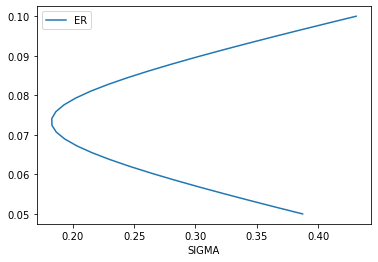

In [3]:
import numpy as np
from scipy.optimize import minimize #Bounds까지 Import시키면 공매도에 관한 제약조건 설정가능
m=np.array([0.06,0.07,0.09]) #기대수익률 배열
H=np.array([[0.1,0,0],[0,0.1,0],[0,0,0.1]]) #분산공분산 2 by2 배열
dim=len(m)
L=int(input('Enter the number of efficeient portfolios: '))
targets=np.linspace(0.05,0.1,L)
weights=[]
exreturns=np.zeros(L)
sigmas=np.zeros(L)

for i in range(L):
    fun=lambda x: np.dot(np.dot(x,H),x)
    con={'type':'eq','fun':lambda x: np.array([np.sum(x*m)-targets[i], np.sum(x)-1])}
    x0=np.ones(dim)*(1/dim)
    eff=minimize(fun,x0,constraints=con)['x']
    weights.append(eff)
    exreturns[i]=np.sum(eff*m)
    var=fun(eff)
    sigmas[i]=np.sqrt(var)
    
import pandas as pd
data=pd.DataFrame(weights,columns=['x1','x2','x3'])
data['ER']=exreturns
data['SIGMA']=sigmas
data.plot(x='SIGMA',y='ER')